# Destructuring $OEF

The final plot of first_day shows the intrinsic value of $OEF strictly based on the weighted value of its holdings

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np

df = pd.read_csv("OEF.csv")
df_list = df.values.tolist()
tickers = []
for x, i in enumerate(df_list):
    tickers.append(df_list[x][0])
prices = yf.download(tickers, period='5d', interval='1m')
print(prices)

[*********************100%***********************]  101 of 101 completed
                            Adj Close                                      \
                                 AAPL        ABBV         ABT         ACN   
Datetime                                                                    
2023-03-27 09:30:00-04:00  160.130005  158.684998   99.000000  273.234985   
2023-03-27 09:31:00-04:00  159.960007  158.589996   99.139999  273.563904   
2023-03-27 09:32:00-04:00  160.020004  158.500000   99.309998  274.010010   
2023-03-27 09:33:00-04:00  160.000000  158.380005   99.334999  273.455994   
2023-03-27 09:34:00-04:00  159.720001  158.429993   99.324997  273.369995   
...                               ...         ...         ...         ...   
2023-03-31 15:55:00-04:00  164.919998  159.259995  101.235001  285.600006   
2023-03-31 15:56:00-04:00  164.934998  159.320007  101.239998  285.519989   
2023-03-31 15:57:00-04:00  164.889999  159.330002  101.230003  285.619995   
202

In [3]:
msft = yf.Ticker('AAPL')
mkt_caps = msft.get_shares_full(start="2023-03-27", end=None)
mkt_cap = pd.DataFrame()
for i in tickers:
    ticker = yf.Ticker(i)
    share_count = ticker.get_shares_full(start='2021-01-01', end=None)
    caps = []
    for x in range(0, 1950):
        cap = share_count[-1] * prices['Adj Close'][i][x]
        caps.append(cap)
    mkt_cap[i] = caps

print(mkt_cap)


              AAPL          MSFT          AMZN          NVDA         GOOGL  \
0     2.572264e+12  2.123459e+12  1.013869e+12  6.661502e+11  1.333013e+12   
1     2.569534e+12  2.113335e+12  1.010677e+12  6.639187e+11  1.327984e+12   
2     2.570497e+12  2.110917e+12  1.011613e+12  6.651397e+11  1.331347e+12   
3     2.570176e+12  2.114166e+12  1.011665e+12  6.654138e+11  1.330962e+12   
4     2.565678e+12  2.113486e+12  1.013357e+12  6.666324e+11  1.332629e+12   
...            ...           ...           ...           ...           ...   
1945  2.649209e+12  2.178763e+12  1.057931e+12  6.913805e+11  1.330834e+12   
1946  2.649450e+12  2.179594e+12  1.058700e+12  6.919783e+11  1.330898e+12   
1947  2.648727e+12  2.181181e+12  1.058981e+12  6.921413e+11  1.330385e+12   
1948  2.649530e+12  2.181785e+12  1.059661e+12  6.924271e+11  1.330642e+12   
1949  2.647924e+12  2.177630e+12  1.058444e+12  6.922527e+11  1.329296e+12   

             BRK-B          GOOG          TSLA          META   

/var/folders/zk/x_yv5dld6x9_ssxq46dg30_w0000gn/T/ipykernel_60699/644226977.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mkt_cap[i] = caps


In [4]:
total_cap = []
for i in range(0, 1950):
    total_cap.append(mkt_cap.iloc[i].sum())
total_cap

[25032117679987.95,
 25193789892901.992,
 25305858711077.207,
 25210305611481.465,
 25223843527555.758,
 25067274091914.15,
 25296662221845.418,
 25301108606223.047,
 25294092146247.53,
 25006590935938.633,
 25292960695130.184,
 25320627441517.867,
 25279456179059.906,
 25342418697645.31,
 25349070147430.918,
 25355412462802.23,
 25365956386837.668,
 25254178757876.805,
 25354573869726.453,
 25133277667222.324,
 25367859172190.508,
 25374111095779.902,
 25367186709737.72,
 25359113805277.027,
 25022530555797.58,
 25023146864154.562,
 25313971683409.836,
 25206944216152.836,
 25314966253502.715,
 25325868747679.96,
 25327280345781.75,
 25320651797893.887,
 25231927972888.223,
 25231300549902.25,
 25327550373182.664,
 25330030198098.844,
 25212930017421.344,
 25322019834203.29,
 25102319260895.137,
 25227489756184.83,
 25327762892023.64,
 25335706633304.168,
 25231282514668.406,
 25316877327170.1,
 25205125249555.78,
 25063313307763.168,
 25089823048547.695,
 25290887156385.562,
 2511210

In [5]:
weights = pd.DataFrame()
for b, i in enumerate(tickers):
    temp = []
    for x in range(0, 1950):
        temp.append(mkt_cap[i][x] / total_cap[b])
    weights[i] = temp

weights = weights.iloc[1: , :]
weights

/var/folders/zk/x_yv5dld6x9_ssxq46dg30_w0000gn/T/ipykernel_60699/2436415451.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weights[i] = temp


,AAPL,MSFT,AMZN,NVDA,GOOGL,BRK-B,GOOG,TSLA,META,XOM,...,EXC,DOW,MET,AIG,CHTR,COF,SPG,BK,KHC,WBA
1,0.102649,0.083883,0.039938,0.026335,0.052648,0.026292,0.052725,0.024408,0.020849,0.017068,...,0.001620,0.001466,0.001713,0.001426,0.002114,0.001432,0.001582,0.001398,0.001884,0.001153
2,0.102688,0.083787,0.039975,0.026384,0.052781,0.026275,0.052875,0.024498,0.020841,0.017065,...,0.001626,0.001465,0.001711,0.001422,0.002120,0.001432,0.001583,0.001398,0.001885,0.001152
3,0.102675,0.083916,0.039977,0.026395,0.052766,0.026309,0.052842,0.024500,0.020885,0.017094,...,0.001624,0.001463,0.001708,0.001423,0.002115,0.001427,0.001581,0.001399,0.001886,0.001152
4,0.102495,0.083889,0.040044,0.026443,0.052832,0.026310,0.052915,0.024543,0.020852,0.017116,...,0.001628,0.001464,0.001710,0.001424,0.002120,0.001424,0.001580,0.001399,0.001887,0.001150
5,0.102406,0.083829,0.039955,0.026373,0.052868,0.026317,0.052930,0.024560,0.020878,0.017117,...,0.001631,0.001468,0.001710,0.001425,0.002121,0.001424,0.001580,0.001397,0.001889,0.001153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,0.105832,0.086480,0.041806,0.027425,0.052761,0.026868,0.052647,0.025875,0.021733,0.017842,...,0.001668,0.001538,0.001776,0.001478,0.002175,0.001473,0.001685,0.001457,0.001890,0.001201
1946,0.105842,0.086513,0.041836,0.027448,0.052763,0.026875,0.052645,0.025899,0.021740,0.017838,...,0.001670,0.001538,0.001778,0.001479,0.002177,0.001472,0.001687,0.001457,0.001889,0.001202
1947,0.105813,0.086576,0.041847,0.027455,0.052743,0.026880,0.052619,0.025903,0.021737,0.017846,...,0.001673,0.001538,0.001778,0.001479,0.002176,0.001472,0.001688,0.001456,0.001891,0.001202
1948,0.105845,0.086600,0.041874,0.027466,0.052753,0.026908,0.052622,0.025899,0.021738,0.017855,...,0.001672,0.001538,0.001779,0.001480,0.002176,0.001473,0.001690,0.001457,0.001890,0.001203


In [8]:
adjClosed = prices['Adj Close']
ret = adjClosed - adjClosed.shift()
ret = ret.reset_index()
ret = ret.iloc[1:, 1:]
total = ret.multiply(weights)
should_ret = []
for i in range(1, 1950):
    should_ret.append(total.loc[i].sum())
should_ret = pd.DataFrame(should_ret)
should_ret.to_csv('OEF_returns.csv')

Vizualiztion of intrinsic value the first 100 mins trading

<Axes: >

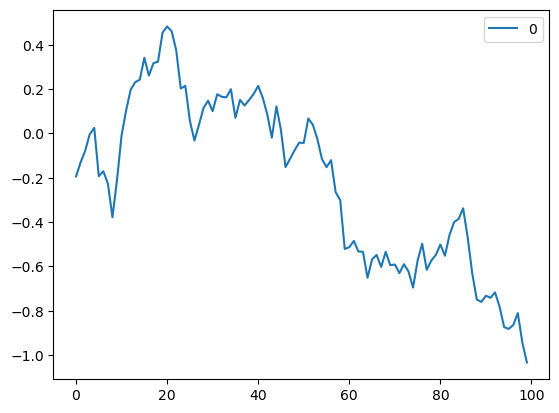

In [9]:
import matplotlib as plt
first_day = should_ret[:389]
first_day = pd.DataFrame(first_day)
first_day[:100].cumsum().plot()